In [130]:
import pandas as pd

In [131]:
df_20 = pd.read_excel('./files_new/df_20table_kor.xlsx')
df_30 = pd.read_excel('./files_new/df_30table_kor.xlsx')
df_40 = pd.read_excel('./files_new/df_40table_kor.xlsx')
df_53 = pd.read_excel('./files_new/df_53table_kor.xlsx')

In [132]:
df_40_1 = df_40[df_40['상병일련번호']==1].reset_index(drop=True)
df_40_1

,명세서 연결코드,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드
0,1,1,01,A090,1
1,2,1,01,I109,1
2,3,1,03,F849,3
3,4,1,54,K0538,54
4,5,1,01,J00,1
...,...,...,...,...,...
5622,5627,1,56,K121,56
5623,5628,1,01,C921,1
5624,5629,1,11,J320,11
5625,5630,1,05,M7954,5


In [133]:
df_2040 = pd.merge(df_20,df_40_1, how='outer', on='명세서 연결코드')
df_2040

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,0,$,$,$,$,30796,1.0,01,A090,1.0
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,0,$,$,$,$,9795,1.0,01,I109,1.0
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,0,$,$,$,$,34835,1.0,03,F849,3.0
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,0,$,$,$,$,35538,1.0,54,K0538,54.0
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,0,$,$,$,$,4665,1.0,01,J00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,0,$,$,$,$,21762,1.0,56,K121,56.0
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,0,V193,$,$,$,45362,1.0,01,C921,1.0
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,0,$,$,$,$,12083,1.0,11,J320,11.0
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,0,$,$,$,$,21067,1.0,05,M7954,5.0


In [134]:
df_2040_age = df_2040[['요양개시일자','수진자연령','상병진료과목코드']]
df_2040_age

,요양개시일자,수진자연령,상병진료과목코드
0,20130108,62,01
1,20130212,74,01
2,20130222,14,03
3,20130608,68,54
4,20131128,19,01
...,...,...,...
5626,20131001,9,56
5627,20130423,20,01
5628,20130112,4,11
5629,20130401,47,05


In [135]:
df_9under = df_2040_age[df_2040_age['수진자연령'] <= 9]
df_9under.reset_index(drop=True)
df_9under['연령대'] = '9세이하'
df_10 = df_2040_age[(df_2040_age['수진자연령'] > 9) & (df_2040_age['수진자연령'] <= 19)]
df_10.reset_index(drop=True)
df_10['연령대'] = '10대'
df_20 = df_2040_age[(df_2040_age['수진자연령'] >= 20) & (df_2040_age['수진자연령'] < 30)]
df_20.reset_index(drop=True)
df_20['연령대'] = '20대'
df_30 = df_2040_age[(df_2040_age['수진자연령'] >= 30) & (df_2040_age['수진자연령'] < 40)]
df_30.reset_index(drop=True)
df_30['연령대'] = '30대'
df_40 = df_2040_age[(df_2040_age['수진자연령'] >= 40) & (df_2040_age['수진자연령'] < 50)]
df_40.reset_index(drop=True)
df_40['연령대'] = '40대'
df_50 = df_2040_age[(df_2040_age['수진자연령'] >= 50) & (df_2040_age['수진자연령'] < 60)]
df_50.reset_index(drop=True)
df_50['연령대'] = '50대'
df_60 = df_2040_age[(df_2040_age['수진자연령'] >= 60) & (df_2040_age['수진자연령'] < 70)]
df_60.reset_index(drop=True)
df_60['연령대'] = '60대'
df_70 = df_2040_age[(df_2040_age['수진자연령'] >= 70) & (df_2040_age['수진자연령'] < 80)]
df_70.reset_index(drop=True)
df_70['연령대'] = '70대'
df_80 = df_2040_age[(df_2040_age['수진자연령'] >= 80) & (df_2040_age['수진자연령'] < 90)]
df_80.reset_index(drop=True)
df_80['연령대'] = '80대'
df_90 = df_2040_age[(df_2040_age['수진자연령'] >= 90) & (df_2040_age['수진자연령'] < 100)]
df_90.reset_index(drop=True)
df_90['연령대'] = '90대'
df_90

C:\Users\admin\AppData\Local\Temp\ipykernel_11580\3131394234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9under['연령대'] = '9세이하'
C:\Users\admin\AppData\Local\Temp\ipykernel_11580\3131394234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['연령대'] = '10대'
C:\Users\admin\AppData\Local\Temp\ipykernel_11580\3131394234.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,요양개시일자,수진자연령,상병진료과목코드,연령대
473,20130827,94,15,90대
1167,20130916,94,01,90대
2276,20130105,93,01,90대
2445,20130117,93,06,90대
2665,20130624,94,01,90대
2765,20130423,94,01,90대
3302,20130709,94,14,90대
4060,20131208,94,01,90대
4599,20130401,94,01,90대
4988,20130416,94,01,90대


In [136]:
df_2040_age = pd.concat([df_9under,df_10,df_20,df_30,df_40,df_50,df_60,df_70,df_80,df_90], axis=0, sort=True)
df_2040_age

,상병진료과목코드,수진자연령,연령대,요양개시일자
6,23,3,9세이하,20131211
11,01,6,9세이하,20130129
20,55,3,9세이하,20130130
48,01,6,9세이하,20130130
54,11,6,9세이하,20130502
...,...,...,...,...
2765,01,94,90대,20130423
3302,14,94,90대,20130709
4060,01,94,90대,20131208
4599,01,94,90대,20130401


In [137]:
df_2040_age['요양개시일자'] = df_2040_age['요양개시일자'].astype(str)
df_2040_age['요양개시월'] = df_2040_age['요양개시일자'].str[4:6]
df_2040_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5631 entries, 6 to 4988
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상병진료과목코드  5627 non-null   object
 1   수진자연령     5631 non-null   int64 
 2   연령대       5631 non-null   object
 3   요양개시일자    5631 non-null   object
 4   요양개시월     5631 non-null   object
dtypes: int64(1), object(4)
memory usage: 264.0+ KB


In [138]:
code = pd.read_excel('./files_new/진료과목코드.xlsx')
code = code.astype(str)
code

,상병진료과목코드,진료과목이름
0,0,일반의
1,1,내과
2,2,신경과
3,3,정신과
4,4,외과
5,5,정형외과
6,6,신경외과
7,7,흉부외과
8,8,성형외과
9,9,마취통증의학과


In [139]:
df_a = pd.merge(df_2040_age,code, how='left', on='상병진료과목코드')
df_a

,상병진료과목코드,수진자연령,연령대,요양개시일자,요양개시월,진료과목이름
0,23,3,9세이하,20131211,12,가정의학과
1,01,6,9세이하,20130129,01,NaN
2,55,3,9세이하,20130130,01,치과보존과
3,01,6,9세이하,20130130,01,NaN
4,11,6,9세이하,20130502,05,소아청소년과
...,...,...,...,...,...,...
5626,01,94,90대,20130423,04,NaN
5627,14,94,90대,20130709,07,피부과
5628,01,94,90대,20131208,12,NaN
5629,01,94,90대,20130401,04,NaN


In [140]:
df_a = df_a.dropna()
df_a

,상병진료과목코드,수진자연령,연령대,요양개시일자,요양개시월,진료과목이름
0,23,3,9세이하,20131211,12,가정의학과
2,55,3,9세이하,20130130,01,치과보존과
4,11,6,9세이하,20130502,05,소아청소년과
5,11,4,9세이하,20130506,05,소아청소년과
6,11,4,9세이하,20130805,08,소아청소년과
...,...,...,...,...,...,...
5613,23,81,80대,20131116,11,가정의학과
5615,23,81,80대,20130711,07,가정의학과
5619,23,81,80대,20130511,05,가정의학과
5621,15,94,90대,20130827,08,비뇨기과


In [142]:
df_2040_age = pd.DataFrame()

df_2040_age = pd.concat([df_2040_age, df_9under, df_10, df_20, df_30, df_40, df_50, df_60, df_70, df_80, df_90], ignore_index=True)

df_2040_age = df_2040_age.reset_index(drop=True)
print(len(df_2040_age))
df_2040_age

5631


,요양개시일자,수진자연령,상병진료과목코드,연령대
0,20131211,3,23,9세이하
1,20130129,6,01,9세이하
2,20130130,3,55,9세이하
3,20130130,6,01,9세이하
4,20130502,6,11,9세이하
...,...,...,...,...
5626,20130423,94,01,90대
5627,20130709,94,14,90대
5628,20131208,94,01,90대
5629,20130401,94,01,90대


In [143]:
df_2040_age = df_2040_age[df_2040_age['상병진료과목코드']!='$']
df_2040_age[df_2040_age['상병진료과목코드']=='$']
df_2040_age

,요양개시일자,수진자연령,상병진료과목코드,연령대
0,20131211,3,23,9세이하
1,20130129,6,01,9세이하
2,20130130,3,55,9세이하
3,20130130,6,01,9세이하
4,20130502,6,11,9세이하
...,...,...,...,...
5626,20130423,94,01,90대
5627,20130709,94,14,90대
5628,20131208,94,01,90대
5629,20130401,94,01,90대


In [144]:
# 월별 연령대별 수진자연령 집계하기
df_2040_age = df_2040_age.pivot_table(values='수진자연령',
                            index='상병진료과목코드',
                            columns='연령대',
                            aggfunc='count')
df_2040_age = df_2040_age.fillna(0)
df_2040_age.drop(axis=0)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [145]:
df_2040_age

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대,9세이하
상병진료과목코드,,,,,,,,,,
01,73.0,66.0,140.0,192.0,364.0,455.0,493.0,62.0,7.0,32.0
02,0.0,7.0,2.0,2.0,28.0,13.0,32.0,3.0,0.0,1.0
03,60.0,4.0,17.0,2.0,10.0,8.0,30.0,1.0,0.0,0.0
04,3.0,6.0,14.0,18.0,33.0,57.0,46.0,0.0,0.0,6.0
05,33.0,30.0,78.0,99.0,171.0,207.0,128.0,0.0,0.0,27.0
06,1.0,3.0,3.0,10.0,13.0,23.0,10.0,0.0,1.0,1.0
07,0.0,0.0,1.0,2.0,0.0,1.0,6.0,0.0,0.0,1.0
08,5.0,1.0,3.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
09,0.0,0.0,0.0,0.0,49.0,97.0,8.0,0.0,0.0,0.0


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

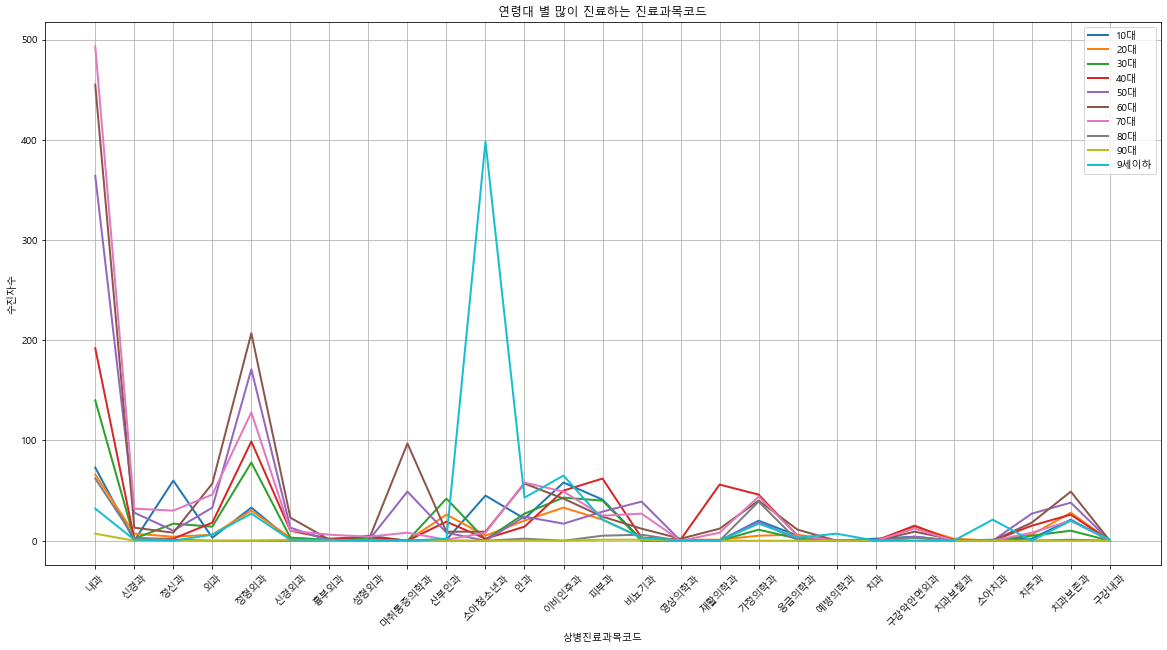

In [158]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
df_2040_age.plot()

plt.title("연령대 별 많이 진료하는 진료과목코드")
plt.ylabel("수진자수")

# x축 범위?
plt.xticks([i for i in range(0,27,1)],['내과',
'신경과',
'정신과',
'외과',
'정형외과'
,'신경외과'
,'흉부외과'
,'성형외과'
,'마취통증의학과'
,'산부인과'
,'소아청소년과'
,'안과'
,'이비인후과'
,'피부과'
,'비뇨기과'
,'영상의학과'
,'재활의학과'
,'가정의학과'
,'응급의학과'
,'예방의학과'
,'치과'
,'구강악안면외과'
,'치과보철과'
,'소아치과'
,'치주과'
,'치과보존과'
,'구강내과'],rotation=45)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

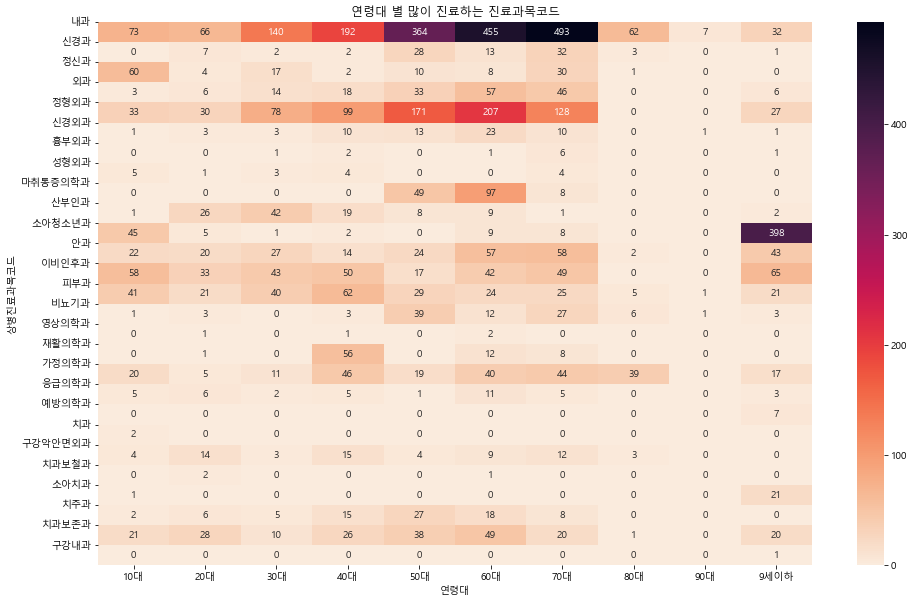

In [163]:
plt.figure(figsize=(16,10))
sns.heatmap(df_2040_age, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("연령대 별 많이 진료하는 진료과목코드")
plt.yticks([i for i in range(0,27,1)],['내과',
'신경과',
'정신과',
'외과',
'정형외과'
,'신경외과'
,'흉부외과'
,'성형외과'
,'마취통증의학과'
,'산부인과'
,'소아청소년과'
,'안과'
,'이비인후과'
,'피부과'
,'비뇨기과'
,'영상의학과'
,'재활의학과'
,'가정의학과'
,'응급의학과'
,'예방의학과'
,'치과'
,'구강악안면외과'
,'치과보철과'
,'소아치과'
,'치주과'
,'치과보존과'
,'구강내과'],rotation=0)
plt.show()